In [264]:
import pickle as pkl
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import cv2

In [265]:
def drawRectangleOnImage(img, bbox, track=0, colour=(0, 255, 0)):
    b, g, r = colour
    img = cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (int(b), int(g), int(r)), 3)
    img = cv2.putText(img, str(track), (bbox[0], bbox[1] - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (int(b), int(g), int(r)), 3)
    return img

In [266]:
# Detection Pre-Processing 

# Remove overlaps in the same frame
def remove_overlaps(detections_pd, tolerance=0.9):
    row_to_remove = []
    for detection in detections_pd.get('detection'):
        length, _ =detections_pd.shape
        for i in range(length):
            IoU = detection.IoU(detections_pd.iloc[i]['detection'])
            if IoU > tolerance and IoU < 1:
                row_to_remove.append(i)
                
    row_to_remove = np.unique(np.array(row_to_remove))
    detections_pd = detections_pd.drop(index=row_to_remove)
        
    return detections_pd

In [267]:
# Detection to DataFrame
def get_detection_dataframe(detections):
    bboxes = []
    bsizes = []
    bdetections = []
    tracks = list(range(0, len(detections)))
    
    colours = []
    for i in range(len(detections)):
        colours.append(tuple(np.random.choice(range(256), size=3).astype('int')))
    
    for detection in detections:
        bbox = np.array(detection.getBBox()).astype('int')
        bboxes.append(bbox)

        bsize = int(detection.areaOfRec())
        bsizes.append(bsize)

        bdetections.append(detection)

    detec = {
        'track': tracks,
        'detection': bdetections,
        'bbox': bboxes,
        'size': bsizes,
        'colour': colours,
    }
    detections_pd = pd.DataFrame(detec)
    detections_pd = detections_pd.sort_values(by=['size'], ascending=False)
    detections_pd = detections_pd.reset_index(drop=True)
    
    return detections_pd

In [268]:
# Load paths
file_path = 'detection_pkls/retinanet_101_detections.pkl'
data_path = '../datasets/AICity_data/train/S03/c010/'

# Load detections
with open(file_path , 'rb') as f:
    all_detections = pkl.load(f)

In [269]:
detections_pd = get_detection_dataframe(all_detections['0'])
detections_pd

,track,detection,bbox,size,colour
0,0,"Frame 0, TL [1284.8372802734375,362.1326904296...","[1284, 362, 1520, 539]",41907,"(80, 43, 6)"
1,6,"Frame 0, TL [542.8624877929688,68.340904235839...","[542, 68, 631, 159]",8089,"(3, 24, 112)"
2,1,"Frame 0, TL [564.6638793945312,96.273307800292...","[564, 96, 658, 168]",6779,"(172, 3, 120)"
3,11,"Frame 0, TL [560.3693237304688,74.730484008789...","[560, 74, 656, 135]",5833,"(120, 176, 214)"
4,2,"Frame 0, TL [928.7540283203125,78.073799133300...","[928, 78, 1014, 145]",5791,"(187, 203, 119)"
5,20,"Frame 0, TL [370.3283996582031,31.751697540283...","[370, 31, 451, 99]",5548,"(139, 158, 5)"
6,8,"Frame 0, TL [895.2154541015625,88.084892272949...","[895, 88, 961, 141]",3582,"(5, 79, 244)"
7,9,"Frame 0, TL [1178.972412109375,103.75167846679...","[1178, 103, 1228, 164]",3049,"(65, 93, 196)"
8,10,"Frame 0, TL [848.9981079101562,96.455963134765...","[848, 96, 916, 140]",3013,"(83, 2, 160)"
9,5,"Frame 0, TL [579.739501953125,74.2380752563476...","[579, 74, 658, 110]",2870,"(236, 99, 246)"


In [270]:
detections_pd = remove_overlaps(detections_pd, 0.4)
detections_pd

,track,detection,bbox,size,colour
0,0,"Frame 0, TL [1284.8372802734375,362.1326904296...","[1284, 362, 1520, 539]",41907,"(80, 43, 6)"
2,1,"Frame 0, TL [564.6638793945312,96.273307800292...","[564, 96, 658, 168]",6779,"(172, 3, 120)"
5,20,"Frame 0, TL [370.3283996582031,31.751697540283...","[370, 31, 451, 99]",5548,"(139, 158, 5)"
7,9,"Frame 0, TL [1178.972412109375,103.75167846679...","[1178, 103, 1228, 164]",3049,"(65, 93, 196)"
17,14,"Frame 0, TL [508.15423583984375,107.4099197387...","[508, 107, 534, 139]",838,"(185, 204, 43)"
18,16,"Frame 0, TL [1493.60888671875,86.6675491333007...","[1493, 86, 1520, 108]",586,"(172, 91, 55)"
19,18,"Frame 0, TL [838.2875366210938,78.842559814453...","[838, 78, 861, 102]",560,"(128, 214, 64)"
20,17,"Frame 0, TL [687.8651123046875,63.630992889404...","[687, 63, 704, 85]",357,"(177, 113, 64)"


In [271]:
# ims = []
# num_frames = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))

# for frame in tqdm(range(1,num_frames-1)):
#     _, image = vidcap.read()
    
    
    
#     if gif:
#         im = ax.imshow(fgmask, animated=True)
#         ims.append([im])
# # break

# if gif:
#     ani = animation.ArtistAnimation(fig, ims, interval=10, blit=True, repeat_delay=10000)
#     ani.save(videoName + ".gif", writer=animation.PillowWriter(fps=24))

In [272]:
# Load video
vidcap = cv2.VideoCapture(data_path + 'vdo.avi')
_, image = vidcap.read()

for index, row in detections_pd.iterrows():
    print(row['colour'])
    image = drawRectangleOnImage(image, row['bbox'], track=row['track'],colour=row['colour'])

(80, 43, 6)
(172, 3, 120)
(139, 158, 5)
(65, 93, 196)
(185, 204, 43)
(172, 91, 55)
(128, 214, 64)
(177, 113, 64)


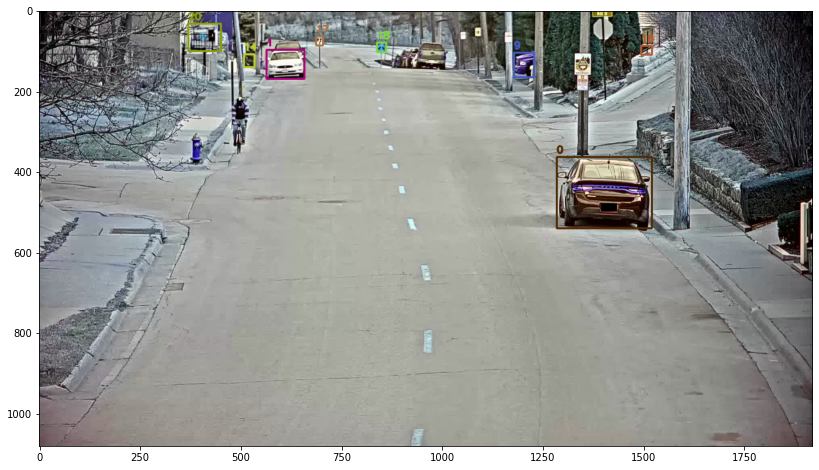

In [273]:
plt.figure(figsize=(16, 8))
plt.imshow(image)